In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Question 1

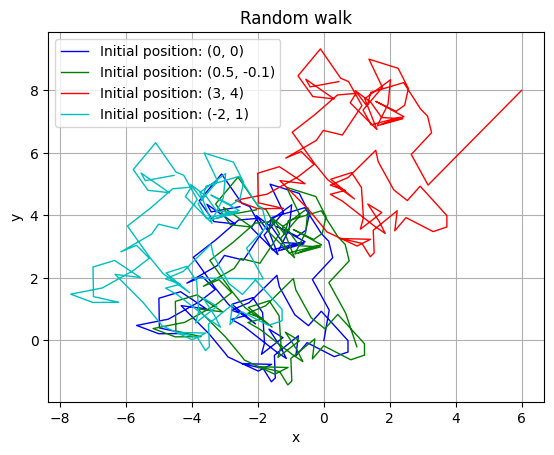

In [2]:
N = 100
a = -1
b = 1

# Different initial positions
ipos = [(0,0), (0.5, -0.1), (3, 4), (-2, 1)]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Generate all random numbers at once
rand_nums_x = a + (b-a)*np.random.uniform(0,1, size=N)
rand_nums_y = a + (b-a)*np.random.uniform(0,1, size=N)

for idx, pos in enumerate(ipos):
    x, y = np.zeros(N), np.zeros(N)
    x[0], y[0] = pos

    # Use cumulative sum of random numbers to generate path
    x[1:] = np.cumsum(rand_nums_x[:-1])
    y[1:] = np.cumsum(rand_nums_y[:-1])

    for i in range(0, N, 1000):
        plt.plot(x[i:i+1000] + x[0], y[i:i+1000] + y[0], linewidth=1, color=colors[idx % len(colors)])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Random walk')
plt.grid(True)
plt.legend(['Initial position: {}'.format(pos) for pos in ipos])
plt.show()

# Question 2.a

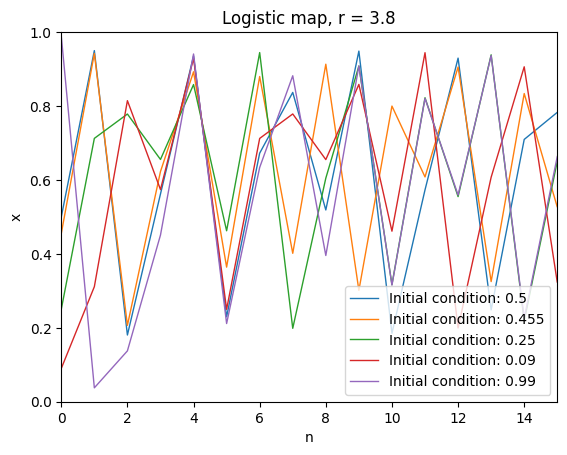

In [3]:
# logistic map

N = 5000 

def logistic_map(x: float, r: float) -> np.float64:
    return r * x * (1 - x)

def logistic_map_iterate(x: np.array, r: float, n: int) -> np.array:
    for i in range(n):
        x[i + 1] = logistic_map(x[i], r)
    return x

# plot the logistic map

# list of initial conditions
initial_conditions = [0.5, 0.455, 0.25, 0.09, 0.99]

r = 3.8

for init_cond in initial_conditions:
    x = np.zeros(N + 1)
    x[0] = init_cond
    x = logistic_map_iterate(x, r, N)
    plt.plot(x, linewidth=1, label=f'Initial condition: {init_cond}')


plt.xlim([0, 15])
plt.ylim([0, 1])
plt.xlabel('n')
plt.ylabel('x')
plt.title('Logistic map, r = ' + str(r))
plt.legend()
plt.show()

# Question 2.b

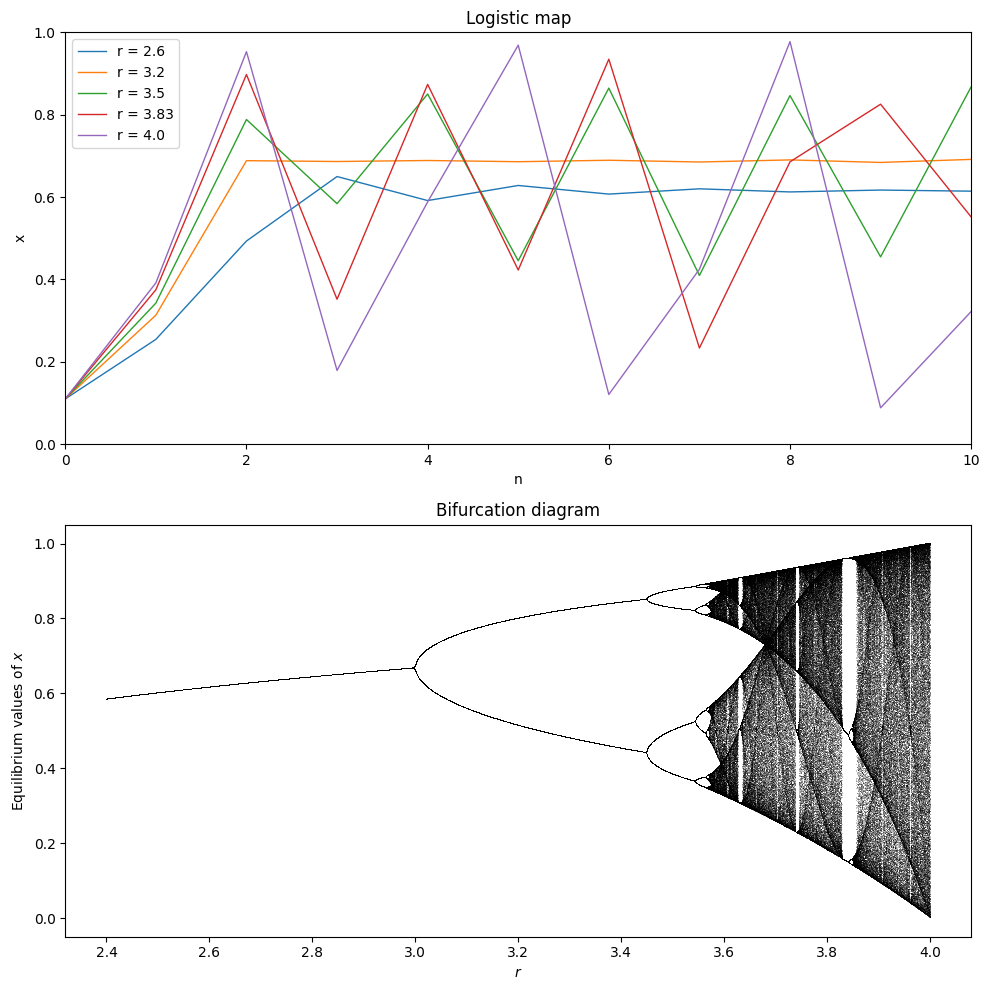

In [2]:
def logistic_map(x, r):
    """The logistic map function."""
    return r * x * (1 - x)

def logistic_map_iterate(x, r, N):
    """Iterates the logistic map N times."""
    for i in range(N):
        x[i + 1] = logistic_map(x[i], r)
    return x

def plot_logistic_map(ax, x, r_series, N):
    """Plots the logistic map for different r values."""
    for r in r_series:
        x = logistic_map_iterate(x, r, N)
        ax.plot(x, linewidth=1, label=f'r = {r}')
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 1])
    ax.set_xlabel('n')
    ax.set_ylabel('x')
    ax.set_title('Logistic map')
    ax.legend()

def plot_bifurcation_diagram(ax, x, r_vals, N, N_skip):
    """Plots the bifurcation diagram."""
    for i in range(N):
        x = logistic_map(x, r_vals)
        if i >= N_skip:
            ax.plot(r_vals, x, ',k', alpha=0.25)
    ax.set_xlabel('$r$')
    ax.set_ylabel('Equilibrium values of $x$')
    ax.set_title('Bifurcation diagram')

N = 1000
N_skip = int(2 * N / 3)
r_series = [2.6, 3.2, 3.5, 3.83, 4.0]
r_vals = np.linspace(2.4, 4.0, 4000)

x = np.zeros(N + 1)
x[0] = 0.11

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot logistic map for different r values
plot_logistic_map(axs[0], x, r_series, N)

# Plot bifurcation diagram
plot_bifurcation_diagram(axs[1], 0.5 * np.ones_like(r_vals), r_vals, N, N_skip)

plt.tight_layout()
plt.show()

# Question 2.c

x1 and x2 diverge after 57 iterations


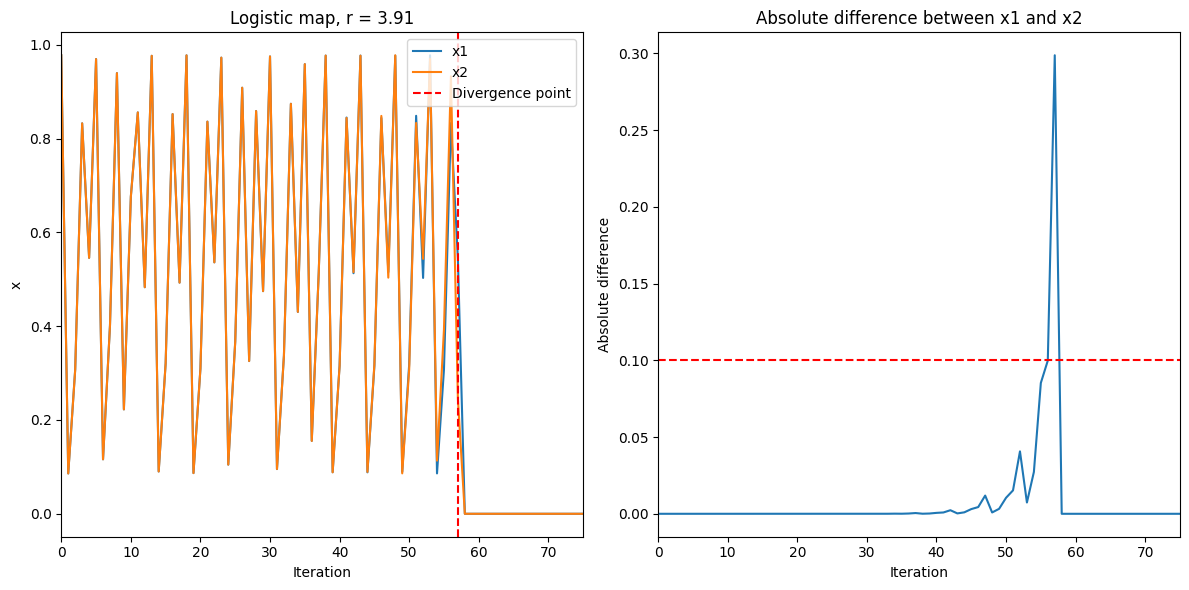

In [5]:
def logistic_map(x, r):
    return r * x * (1 - x)

r = 3.91
x1 = 0.5
x2 = x1 + 1e-6
N = 1000

x1_values = np.zeros(N)
x2_values = np.zeros(N)

for i in range(N):
    x1 = logistic_map(x1, r)
    x2 = logistic_map(x2, r)
    x1_values[i] = x1
    x2_values[i] = x2
    if abs(x1 - x2) > 0.1:
        divergence_point = i
        break

print(f"x1 and x2 diverge after {divergence_point} iterations")

# Plot the two time series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x1_values, label='x1')
plt.plot(x2_values, label='x2')
plt.axvline(divergence_point, color='r', linestyle='--')  # Divergence point
plt.xlim([0, 75])
plt.xlabel('Iteration')
plt.ylabel('x')
plt.legend(['x1', 'x2', 'Divergence point'])
plt.title('Logistic map, r = ' + str(r))

# Plot their absolute difference
plt.subplot(1, 2, 2)
plt.plot(abs(x1_values - x2_values))
plt.axhline(0.1, color='r', linestyle='--')  # 10% of the whole space
plt.xlim([0, 75])
plt.xlabel('Iteration')
plt.ylabel('Absolute difference')

plt.tight_layout()
plt.title('Absolute difference between x1 and x2')
plt.show()